# 사전 준비


In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 디렉토리 이동(이후 경로문제 복잡함 방지)
cd /content/drive/MyDrive/안봐도보이조_project

In [ ]:
# 모듈 및 라이브러리 호출
import os
import glob
import shutil

from PIL import Image
import cv2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 폴더 내 복수개로 이루어진 상품 이미지 삭제


- 참고 이미지와 같이 단수/복수 상품으로 데이터가 구성되어있음
- 복수 이미지는 불필요하므로 삭제

 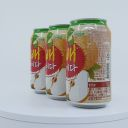

## 복수 이미지 삭제 함수 정의

In [ ]:
def delete_multi_image(img_path): # 삭제하려는 이미지들이 존재하는 경로를 인자로 받음
  
  i = 0 # 처리한 이미지 개수를 세기위해 i 변수 지정
  
  img_folder_list = list(glob.iglob(img_path+'/*')) # 해당 경로 내 모든 폴더 리스트 생성

  for img_folder in img_folder_list: # 해당 경로 내 모든 폴더에 대해 반복
    for img in glob.glob(img_folder+'/*m*.jpg'): # 해당 폴더 내 모든 m이 들어가는 jpg 파일에 대해 반복
      os.remove(img) # 이미지 삭제
      i += 1 # 1회 처리할때마다 i는 1씩증가
  
  print(i,'개의 복수 이미지 삭제') # 총 처리 이미지 개수 출력

## 함수 실행

In [ ]:
# trian data의 mulit image 삭제
train_path = './train_CAN'
delete_multi_image(train_path)

# valid data 의 mulit image 삭제
valid_path = './valid_CAN'
delete_multi_image(valid_path)

# 이미지 리사이즈

## resize 함수 : PIL 사용

In [ ]:
def resize_images(img_path, target_size, data_cat): # 이미지 경로, 타겟 사이즈, 데이터 분류(train/valid)

  img_folder_list = glob.glob(img_path+'/*') # 해당 경로 내 모든 폴더 리스트 생성

  for img_folder in img_folder_list: # 해당 경로 내 모든 폴더에 대해 반복
    img_num = 1
    for img in glob.glob(img_folder+'/*.jpg'): # 해당 폴더 내 모든 jpg 파일에 대해 반복
      old_img=Image.open(img) # 기존 이미지 열기
      new_img=old_img.resize(target_size,Image.ANTIALIAS) # 기존 이미지를 target_size로 리사이즈
    
      if not os.path.exists(f'./resize_{data_cat}_{target_size}'):
        os.mkdir(f'./resize_{data_cat}_{target_size}') # 리사이즈한 데이터가 저장될 폴더 생성
      
      product_num = img.split('/')[-1].split('_')[0]

      new_img.save(f'./resize_{data_cat}_{target_size}/{product_num}_{img_num}.jpeg', "JPEG") # 해당 이미지를 상품번호_이미지번호.jpeg로 생성한 폴더에 저장

      img_num += 1

  print("Image resize completed!")

In [ ]:
resize_images('./오리', (512,512), '연습') # 45초

## resize 함수 : openCV 사용

In [ ]:
def resize_images(img_path, target_size, data_cat): # 이미지 경로, 타겟 사이즈, 데이터 분류(train/valid)

  img_folder_list = glob.glob(img_path+'/*') # 해당 경로 내 모든 폴더 리스트 생성

  for img_folder in img_folder_list: # 해당 경로 내 모든 폴더에 대해 반복
    img_num = 1
    for img in glob.glob(img_folder+'/*.jpg'): # 해당 폴더 내 모든 jpg 파일에 대해 반복
      old_img=cv2.imread(img) # 기존 이미지 열기
      new_img=cv2.resize(old_img,target_size,cv2.INTER_AREA) # 기존 이미지를 target_size로 리사이즈
    
      if not os.path.exists(f'./resize_{data_cat}_{target_size}'):
        os.mkdir(f'./resize_{data_cat}_{target_size}') # 리사이즈한 데이터가 저장될 폴더 생성
      
      product_num = img.split('/')[-1].split('_')[0]

      cv2.imwrite(f'./resize_{data_cat}_{target_size}/{product_num}_{img_num}.jpg', new_img) # 해당 이미지를 상품번호_이미지번호.jpg로 생성한 폴더에 저장

      img_num += 1

  print("Image resize completed!")

In [ ]:
resize_images('./오리', (512,512), 'cv_2_연습_2') # 7초

In [ ]:
# 시간상 이득인 openCV를 이용한 함수 사용
resize_images('./valid_CAN', (512,512), 'valid')
resize_images('./train_CAN', (512,512), 'train')

## 변환된 이미지를 다시 원하는 사이즈로 리사이즈

In [ ]:
# resize 함수 정의 : openCV사용
def re_resize_images(img_path, target_size, data_cat): # 이미지 경로, 타겟 사이즈, 데이터 분류(train/valid)

  img_list = glob.glob(img_path+'/*') # 해당 경로 내 모든 이미지 리스트 생성

  for img in img_list: # 해당 경로 내 모든 이미지에 대해 반복
    old_img=cv2.imread(img) # 기존 이미지 열기
    new_img=cv2.resize(old_img,target_size,cv2.INTER_AREA) # 기존 이미지를 target_size로 리사이즈
    
    if not os.path.exists(f'./resize_{data_cat}_{target_size}'):
      os.mkdir(f'./resize_{data_cat}_{target_size}') # 리사이즈한 데이터가 저장될 폴더 생성
      
    image_name = img.split('/')[-1]

    cv2.imwrite(f'./resize_{data_cat}_{target_size}/{image_name}', new_img) # 해당 이미지를 상품번호_이미지번호.jpg로 생성한 폴더에 저장

  print("Image resize completed!")

In [ ]:
re_resize_images('./resize_valid_(512, 512)', (256,256), 'valid')
re_resize_images('./resize_train_(512, 512)', (256,256), 'train')

### 다른 방법

In [ ]:
shutil.copytree('./valid_CAN', './valid_CAN_resize') # 원본이미지를 복사

In [ ]:
def re_resize_images(img_path, target_size):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    
    for img in images: # 복사한 폴더 내 파일들을 리사이즈해서 대체
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [ ]:
train_path = glob.glob('./valid_CAN_resize/*')
for path in train_path: # 반복문을 이용해 모든 상품에 대해 이미지 리사이즈
    re_resize_images(path)

# 불필요한 배경이 존재하는 이미지 삭제

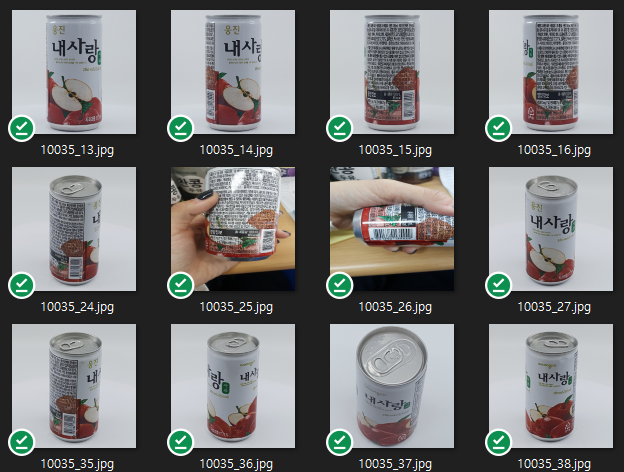

In [ ]:
# 중간에 불필요한 바탕이 존재하는 이미지가 있음
# 수작업으로 제거

# 처리된 이미지를 다시 각 폴더로 구분

## 각 이미지를 각 폴더로 이동시키는 함수 정의

In [ ]:
def move_img(img_path):
  for img in tqdm(glob.glob(img_path+'/*.jpg')): # 모든 이미지에 대해 반복
    prod_id = img.split('/')[-1].split('_')[0] # 해당 이미지 경로에서 상품고유번호 추출
    prod = img.split('/')[-1] # 상품명 추출
    if not os.path.exists(f'{img_path}/{prod_id}'): # 폴더가 없으면 
      os.mkdir(f'{img_path}/{prod_id}') # 데이터가 저장될 폴더 생성
    shutil.move(img, f'{img_path}/{prod_id}/{prod}') # 기존 폴더에서 원하는 폴더로 이동

## 함수 실행

In [ ]:
move_img('./resize_valid_(256,256)')
move_img('./resize_train_(256,256)')

# 분류 상품 선정

- 193개의 전체 카테고리를 분류하기에는 가용 자원 측면에서 어려움이 존재
-  용량에 따른 분류는 불필요하다고 판단
-  용량에 관계없이 10개의 상품만을 선택해 해당 데이터에 대해서 작업 수행
-  선택 상품은 아래와 같음
  - 갈아만든배
  - 레쓰비
  - 마운틴듀
  - 밀키스
  - 스프라이트
  - 칠성사이다
  - 코카콜라
  - 트로피카나망고
  - 펩시콜라
  - 환타오렌지

# image augmentation


- 용량을 무시하고 상품별로 데이터를 모아도 데이터가 상당히 부족
  - 평균적으로 상품당 100여개의 이미지
  - 하지만 분류를 위해 최소 클래스당 1000 여개의 데이터가 필요함
  - 따라서 데이터 수를 늘려야한다고 판단
- 크롤링을 통해 이미지를 추가 수집하는데에는 아래의 문제가 있음
  - 크롤링의 통해 얻은 이미지는 배경 등의 불필요 데이터가 존재하므로 추가적인 전처리 필요
- 따라서 이미 가지고 있는 데이터를 이미지 제너레이터를 통해 생성하기로 결정
  - 이미 깔끔하게 전처리된 데이터를 사용하므로 추가적인 전처리 불필요
  - 데이터 클래스간 불균형이 존재하더라고 총 생성 후 이미지수를 비슷하게 맞춰줌으로써 데이터 불균형 문제 해결 가능
  - 한정된 데이터로부터 train/valid/test 데이터 생성 가능

## 이미지 생성 함수 정의

In [ ]:
def aug_img(path,aug_num): # 해당 경로 내 모든 폴더의 이미지를 최소 aug_num만큼 생성
    # 이미지 제너레이터 객체 생성
    gen=ImageDataGenerator(rotation_range=90, # 90도 범위 내에서 랜덤하게 회전
                       width_shift_range=0.2, # 20% 범위 내에서 랜덤하게 좌우 이동
                       height_shift_range=0.2, # 20% 범위 내에서 랜덤하게 상하 이동
                       zoom_range=[0.8,1.2], # 0.8~1.2 범위 내에서 확대 및 축소
                       horizontal_flip=True, # 50% 확률로 수평 반전
                       vertical_flip=True, # 50% 확률로 수직 반전
                       fill_mode='nearest') # 이미지 변경 후 생기는 빈 공간은 가까운 데이터로 채움
    
    folder_list = [file for file in glob.glob(f'{path}/*') if not file.endswith('.ini')] # 폴더만 추출

    for folder in tqdm((folder_list)): # 모든 폴더에 대해 반복
        
        iter_num = (aug_num//(len(glob.glob(f'{folder}/*.jpg'))))+1 # 이미지당 생성 횟수 지정
        
        for img in glob.glob(f'{folder}/*.jpg'): # 모든 이미지에 대해 반복
            raw_img=load_img(img) # 이미지 불러오기
            x=img_to_array(raw_img)  # 이미지를 array로 변경 
            x=x.reshape((1,)+x.shape) # img를 4차원으로
            i=0 # 생성된 이미지 카운트를 위한 변수
             # 동일 폴더 내에 이미지 생성하기
            for batch in gen.flow(x,batch_size=1,save_to_dir=folder,save_prefix="gen",save_format="jpg"): 
                i+=1
                if i >= iter_num: # 생성횟수만큼 생성하면 종료
                    break

## 함수 실행

In [ ]:
aug_img('./train_10',1000)
aug_img('./valid_10',100)
aug_img('./test_10',50)

## 결과 예시
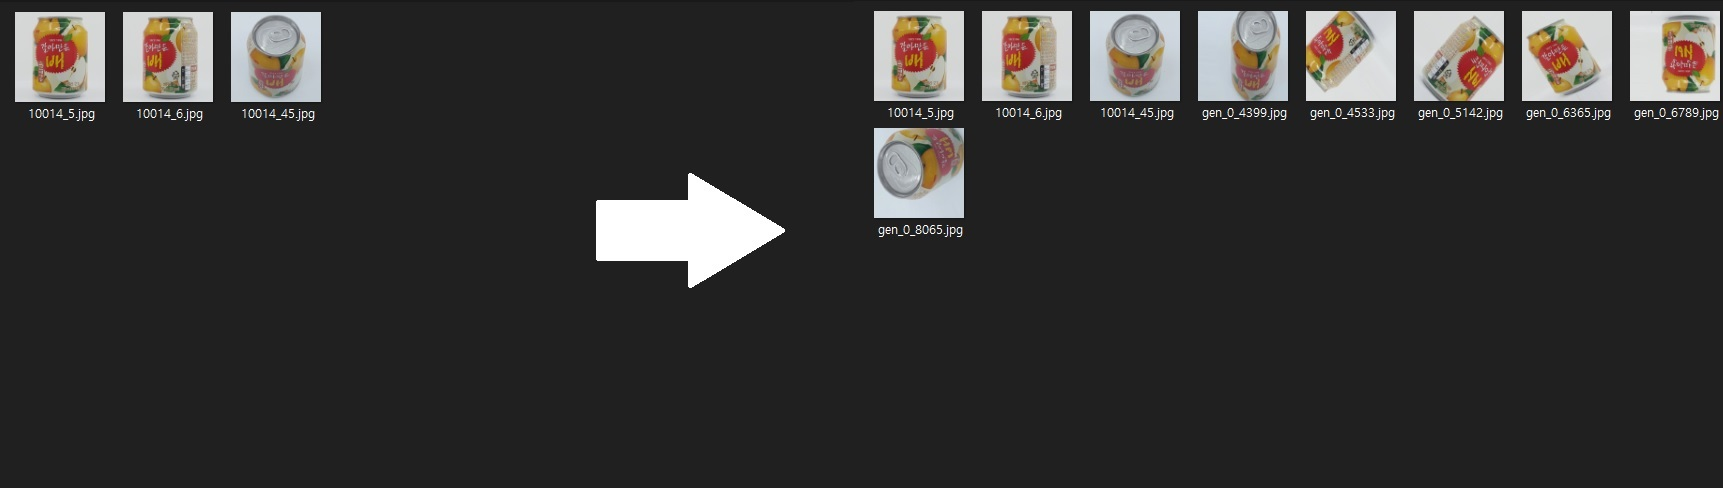


# 이미지를 불러와 numpy 배열로 저장 및 스케일링


- 데이터 용량 문제로 불가능 
- 이미지 제너레이터 활용으로 변경
- 아래 데이터 불러오기 관련 코드는 남겨둠

In [ ]:
# 경로 내 모든 이미지를 불러와 하나의 numpy array로 만드는 함수 정의

def load_img(path, number_of_data, h_pixel, v_pixel, channel): # 경로, 이미지 총 개수, 가로 픽셀 수, 세로 픽셀 수, 채널 수(흑백/컬러/알파채널여부 등 고려)

  # 이미지 데이터와 라벨 데이터를 담을 matrix 생성
  imgs=np.zeros(number_of_data*h_pixel*v_pixel*channel, dtype=np.uint8).reshape(number_of_data, h_pixel, v_pixel, channel) # 이미지의 데이터는 0~255이기 때문에 데이터타입은 uint8로 지정
  labels=np.zeros(number_of_data,dtype=object) # 라벨로 사용할 고유번호는 최대 90000대이므로 데이터타입 int32

  idx=0 # 순서를 나타낼 인덱스 초기값 지정
  for folder in tqdm(glob.glob(f'{path}/*')):
    for img in glob.glob(f'{folder}/*.jpg'):
      img_array = np.array(Image.open(img),dtype=np.uint8) # 이미지를 어레이로 불러오기
      imgs[idx,:,:,:]=img_array    # 데이터 영역에 이미지 어레이를 복사
      labels[idx]= img.split('/')[-2]  # 상품명을 라벨로 저장
      idx=idx+1 # 순서 +1

  print(f'{number_of_data}개의 이미지 중 {idx}개의 이미지 np.array로 변환 완료')
  return imgs, labels

In [ ]:
path = './train_8' # 작업할 이미지 경로
number_of_data = 0 # 해당 경로 내 총 이미지 수를 담을 변수
for folder in glob.glob(f'{path}/*'):
  number_of_data += len(glob.glob(f'{folder}/*.jpg'))
train_img,train_label = load_img(path, number_of_data, 256, 256, 3) # 이미지 불러오기
np.save('./train_8_img.npy',train_img) # 넘파이 배열 파일로 저장
np.save('./train_8_label.npy',train_label)
print(train_img.shape,train_label.shape) # 결과 확인

In [ ]:
path = './valid_8' # 작업할 이미지 경로
number_of_data = 0 # 해당 경로 내 총 이미지 수를 담을 변수
for folder in glob.glob(f'{path}/*'):
  number_of_data += len(glob.glob(f'{folder}/*.jpg'))
valid_img,valid_label = load_img(path, number_of_data, 256, 256, 3) # 이미지 불러오기
np.save('./valid_8_img.npy',valid_img) # 넘파이 배열 파일로 저장
np.save('./valid_8_label.npy',valid_label)
print(valid_img.shape,valid_label.shape) # 결과 확인

In [ ]:
# 결과 이미지로 확인
img = train_img[133]
plt.imshow(img)
print(train_label[133])

In [ ]:
# 저장한 이미지 어레이 불러오기
train_img = np.load('./(256,256)_train_img.npy')
train_label = np.load('./(256,256)_train_label.npy')
valid_img = np.load('./(256,256)_valid_img.npy')
valid_label = np.load('./(256,256)_valid_label.npy')

# 스케일링
train_img = train_img/255.0
valid_img = valid_img/255.0
# 램용량 초과로 진행 불가능

# image generator를 활용한 train/valid/test 데이터 셋 준비


- 처리된 데이터를 이미지 제너레이터를 통해 학습 데이터로 사용하기 위해 제너레이터 인스턴스 생성
- 제너레이터에서 스케일링과 리사이즈 과정이 포함
- flow_from_directory 활용하므로 라벨링 과정 추가 불필요

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,         # 픽셀 값을 0~1 범위로 변환(scaling)
                                   rotation_range=40,      # 40도까지 회전
                                   width_shift_range=0.2,  # 20%까지 좌우 이동
                                   height_shift_range=0.2, # 20%까지 상하 이동
                                   shear_range=0.2,        # 20%까지 기울임
                                   zoom_range=0.2,         # 20%까지 확대/축소
                                   horizontal_flip=True)   # 좌우 뒤집기
    
train_generator = train_datagen.flow_from_directory('./train_10', # 데이터가 존재하는 디렉토리
                                                    batch_size=50, # 배치사이즈(변경가능)
                                                    class_mode='categorical', # 다중 분류이므로 categorical
                                                    target_size=(64, 64)) # 모델에 입력해줄 데이터 사이즈(변경가능)

valid_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
valid_generator = valid_datagen.flow_from_directory('./valid_10',
                                                    batch_size=20,      
                                                    class_mode='categorical', 
                                                    target_size=(64, 64))

test_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
test_generator = test_datagen.flow_from_directory('./test_10',
                                                  batch_size=10,      
                                                  class_mode='categorical', 
                                                  target_size=(64, 64))

In [ ]:
# 각 데이터의 클래스 인덱스 확인 > 추가적인 라벨링 불필요
print(train_generator.class_indices)

In [ ]:
print(valid_generator.class_indices)

In [ ]:
print(test_generator.class_indices)